# Goal
This will train multiple supervised models (i.e., numerical prediction models) used to predict monthly inventory by state and determine which model fits best.

# 0) Setup

In [1]:
# Import dependencies.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import tensorflow as tf
import keras
import clf
from sqlalchemy import create_engine
import matplotlib as plt
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import numpy as np

# 1) Connect to / Load in SQL Table

In [ ]:
raw_df = pd.read_csv("Resources/.csv")

In [2]:
df=pd.read_csv("data.csv")
df

,Unnamed: 0,median_listing_price,median_listing_price_mm,active_listing_count,active_listing_count_mm,median_days_on_market,median_days_on_market_mm,new_listing_count,new_listing_count_mm,price_increased_count,...,average_listing_price_mm,total_listing_count,Target,avg_hotness_rank_mm,avg_hotness_score,temperature_F,temp_change_pct,unemployment_rate,unemployment_rate_change_pct,season
0,0,309900,-0.0038,12519,-0.0298,69,0.1695,4256,-0.2370,240,...,-0.0070,16555,Not Hot,0.048780,36.241087,49.0,-0.113924,2.8,0.037037,Winter
1,1,311083,-0.0124,12904,0.0314,59,0.0926,5578,-0.1273,358,...,-0.0184,17597,Not Hot,36.048780,36.361202,55.3,-0.096405,2.7,0.000000,Fall
2,2,315000,-0.0139,12511,0.0476,54,0.0385,6392,-0.2228,308,...,-0.0047,17788,Not Hot,-6.731707,37.750558,61.2,-0.170732,2.7,0.038462,Fall
3,3,319450,-0.0061,11943,0.0111,52,0.1556,8224,0.1422,344,...,-0.0082,17905,Hot,64.902439,37.749793,73.8,-0.069357,2.6,0.000000,Fall
4,4,321420,-0.0028,11812,0.0505,45,0.1842,7200,-0.1018,290,...,-0.0058,17581,Hot,-30.804878,40.812345,79.3,-0.028186,2.6,0.000000,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,3195,244900,0.0082,3453,-0.0733,131,0.0650,912,0.5616,18,...,0.0075,3822,Not Hot,-0.875000,41.428795,25.1,0.054622,4.2,-0.023256,Winter
3196,3196,242900,0.0048,3726,-0.0814,123,0.1284,584,-0.2255,16,...,0.0070,4042,Not Hot,18.250000,41.373902,23.8,-0.314121,4.3,0.000000,Winter
3197,3197,241750,-0.0246,4056,-0.1007,109,0.0792,754,-0.0981,16,...,-0.0539,4397,Not Hot,21.250000,42.405113,34.7,-0.155718,4.3,0.000000,Fall
3198,3198,247850,-0.0002,4510,-0.0493,101,0.1099,836,-0.1992,18,...,-0.0021,4873,Not Hot,49.500000,43.585320,41.1,-0.241697,4.3,0.000000,Fall


In [3]:
df

,Unnamed: 0,median_listing_price,median_listing_price_mm,active_listing_count,active_listing_count_mm,median_days_on_market,median_days_on_market_mm,new_listing_count,new_listing_count_mm,price_increased_count,...,average_listing_price_mm,total_listing_count,Target,avg_hotness_rank_mm,avg_hotness_score,temperature_F,temp_change_pct,unemployment_rate,unemployment_rate_change_pct,season
0,0,309900,-0.0038,12519,-0.0298,69,0.1695,4256,-0.2370,240,...,-0.0070,16555,Not Hot,0.048780,36.241087,49.0,-0.113924,2.8,0.037037,Winter
1,1,311083,-0.0124,12904,0.0314,59,0.0926,5578,-0.1273,358,...,-0.0184,17597,Not Hot,36.048780,36.361202,55.3,-0.096405,2.7,0.000000,Fall
2,2,315000,-0.0139,12511,0.0476,54,0.0385,6392,-0.2228,308,...,-0.0047,17788,Not Hot,-6.731707,37.750558,61.2,-0.170732,2.7,0.038462,Fall
3,3,319450,-0.0061,11943,0.0111,52,0.1556,8224,0.1422,344,...,-0.0082,17905,Hot,64.902439,37.749793,73.8,-0.069357,2.6,0.000000,Fall
4,4,321420,-0.0028,11812,0.0505,45,0.1842,7200,-0.1018,290,...,-0.0058,17581,Hot,-30.804878,40.812345,79.3,-0.028186,2.6,0.000000,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,3195,244900,0.0082,3453,-0.0733,131,0.0650,912,0.5616,18,...,0.0075,3822,Not Hot,-0.875000,41.428795,25.1,0.054622,4.2,-0.023256,Winter
3196,3196,242900,0.0048,3726,-0.0814,123,0.1284,584,-0.2255,16,...,0.0070,4042,Not Hot,18.250000,41.373902,23.8,-0.314121,4.3,0.000000,Winter
3197,3197,241750,-0.0246,4056,-0.1007,109,0.0792,754,-0.0981,16,...,-0.0539,4397,Not Hot,21.250000,42.405113,34.7,-0.155718,4.3,0.000000,Fall
3198,3198,247850,-0.0002,4510,-0.0493,101,0.1099,836,-0.1992,18,...,-0.0021,4873,Not Hot,49.500000,43.585320,41.1,-0.241697,4.3,0.000000,Fall


# 2) Preprocess Data

In [4]:
X = df.drop('Target', axis=1)
X

,Unnamed: 0,median_listing_price,median_listing_price_mm,active_listing_count,active_listing_count_mm,median_days_on_market,median_days_on_market_mm,new_listing_count,new_listing_count_mm,price_increased_count,...,average_listing_price,average_listing_price_mm,total_listing_count,avg_hotness_rank_mm,avg_hotness_score,temperature_F,temp_change_pct,unemployment_rate,unemployment_rate_change_pct,season
0,0,309900,-0.0038,12519,-0.0298,69,0.1695,4256,-0.2370,240,...,404967,-0.0070,16555,0.048780,36.241087,49.0,-0.113924,2.8,0.037037,Winter
1,1,311083,-0.0124,12904,0.0314,59,0.0926,5578,-0.1273,358,...,407813,-0.0184,17597,36.048780,36.361202,55.3,-0.096405,2.7,0.000000,Fall
2,2,315000,-0.0139,12511,0.0476,54,0.0385,6392,-0.2228,308,...,415469,-0.0047,17788,-6.731707,37.750558,61.2,-0.170732,2.7,0.038462,Fall
3,3,319450,-0.0061,11943,0.0111,52,0.1556,8224,0.1422,344,...,417431,-0.0082,17905,64.902439,37.749793,73.8,-0.069357,2.6,0.000000,Fall
4,4,321420,-0.0028,11812,0.0505,45,0.1842,7200,-0.1018,290,...,420863,-0.0058,17581,-30.804878,40.812345,79.3,-0.028186,2.6,0.000000,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,3195,244900,0.0082,3453,-0.0733,131,0.0650,912,0.5616,18,...,472840,0.0075,3822,-0.875000,41.428795,25.1,0.054622,4.2,-0.023256,Winter
3196,3196,242900,0.0048,3726,-0.0814,123,0.1284,584,-0.2255,16,...,469304,0.0070,4042,18.250000,41.373902,23.8,-0.314121,4.3,0.000000,Winter
3197,3197,241750,-0.0246,4056,-0.1007,109,0.0792,754,-0.0981,16,...,466040,-0.0539,4397,21.250000,42.405113,34.7,-0.155718,4.3,0.000000,Fall
3198,3198,247850,-0.0002,4510,-0.0493,101,0.1099,836,-0.1992,18,...,492584,-0.0021,4873,49.500000,43.585320,41.1,-0.241697,4.3,0.000000,Fall


In [5]:
pd.get_dummies(X['season'])

,Fall,Spring,Summer,Winter
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
3195,0,0,0,1
3196,0,0,0,1
3197,1,0,0,0
3198,1,0,0,0


In [6]:
X = pd.get_dummies(X)
print(X.columns)
X

Index(['Unnamed: 0', 'median_listing_price', 'median_listing_price_mm',
       'active_listing_count', 'active_listing_count_mm',
       'median_days_on_market', 'median_days_on_market_mm',
       'new_listing_count', 'new_listing_count_mm', 'price_increased_count',
       'price_increased_count_mm', 'price_reduced_count',
       'price_reduced_count_mm', 'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_mm', 'median_square_feet',
       'median_square_feet_mm', 'average_listing_price',
       'average_listing_price_mm', 'total_listing_count',
       'avg_hotness_rank_mm', 'avg_hotness_score', 'temperature_F',
       'temp_change_pct', 'unemployment_rate', 'unemployment_rate_change_pct',
       'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')


,Unnamed: 0,median_listing_price,median_listing_price_mm,active_listing_count,active_listing_count_mm,median_days_on_market,median_days_on_market_mm,new_listing_count,new_listing_count_mm,price_increased_count,...,avg_hotness_rank_mm,avg_hotness_score,temperature_F,temp_change_pct,unemployment_rate,unemployment_rate_change_pct,season_Fall,season_Spring,season_Summer,season_Winter
0,0,309900,-0.0038,12519,-0.0298,69,0.1695,4256,-0.2370,240,...,0.048780,36.241087,49.0,-0.113924,2.8,0.037037,0,0,0,1
1,1,311083,-0.0124,12904,0.0314,59,0.0926,5578,-0.1273,358,...,36.048780,36.361202,55.3,-0.096405,2.7,0.000000,1,0,0,0
2,2,315000,-0.0139,12511,0.0476,54,0.0385,6392,-0.2228,308,...,-6.731707,37.750558,61.2,-0.170732,2.7,0.038462,1,0,0,0
3,3,319450,-0.0061,11943,0.0111,52,0.1556,8224,0.1422,344,...,64.902439,37.749793,73.8,-0.069357,2.6,0.000000,1,0,0,0
4,4,321420,-0.0028,11812,0.0505,45,0.1842,7200,-0.1018,290,...,-30.804878,40.812345,79.3,-0.028186,2.6,0.000000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,3195,244900,0.0082,3453,-0.0733,131,0.0650,912,0.5616,18,...,-0.875000,41.428795,25.1,0.054622,4.2,-0.023256,0,0,0,1
3196,3196,242900,0.0048,3726,-0.0814,123,0.1284,584,-0.2255,16,...,18.250000,41.373902,23.8,-0.314121,4.3,0.000000,0,0,0,1
3197,3197,241750,-0.0246,4056,-0.1007,109,0.0792,754,-0.0981,16,...,21.250000,42.405113,34.7,-0.155718,4.3,0.000000,1,0,0,0
3198,3198,247850,-0.0002,4510,-0.0493,101,0.1099,836,-0.1992,18,...,49.500000,43.585320,41.1,-0.241697,4.3,0.000000,1,0,0,0


In [7]:
y = LabelEncoder().fit_transform(df['Target'])
y

array([1, 1, 1, ..., 1, 1, 1])

# 3) Split into Train/Test

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
# Scaling the Data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4) Apply Different Models and Hyperparameterize, and Compare Results
Models to train/test:
- Random forest
- Logistic regression
- Neural networks

Consider the following questions:
- What pros/cons are important to consider for each model?
- Which score(s) make sense for our scenario? Is accuracy the most important score for our model? In other words, should precision, etc. take precedence over other scores to determine the best model?

False Positive: The model predicts a "hot" market (i.e., an increase in inventory), but in reality, it was not hot. This would negatively impact the buyer in facing stiffer competition due to lower inventory, thus potentially paying more for a home than expected or not being able to purchase a home at all.

False Negative: The model predicts a "not hot" market (i.e., a decrease in inventory), but in reality, it was hot. This may negatively impact the buyer in missing out altogether on a housing market with higher inventory.

## Random Forest Model

In [10]:
clf = RandomForestClassifier(random_state=1, n_estimators=500)
fit=clf.fit(X_train_scaled, y_train)
print(f'Training Score: {fit.score(X_train_scaled, y_train)}')
print(f'Testing Score: {fit.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.92


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = clf.predict(X_test)
confusion_matrix(y_true, y_pred)

C:\Users\jh580\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([[347,  19],
       [281, 153]], dtype=int64)

In [13]:
confusion_matrix(y, clf.predict(X))

C:\Users\jh580\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([[1379,   99],
       [1087,  635]], dtype=int64)

In [14]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.95      0.70       366
           1       0.89      0.35      0.50       434

    accuracy                           0.62       800
   macro avg       0.72      0.65      0.60       800
weighted avg       0.74      0.62      0.59       800



[0.01232577 0.01239461 0.03524654 0.01219938 0.17809635 0.0264005
 0.06483809 0.01278521 0.04738371 0.01172233 0.01327569 0.01193803
 0.12575452 0.01421636 0.01887994 0.01317878 0.03649449 0.01321731
 0.01964387 0.01197634 0.01467244 0.01420068 0.03168968 0.12946263
 0.01580329 0.01753773 0.02550467 0.02975198 0.01924448 0.01016461]


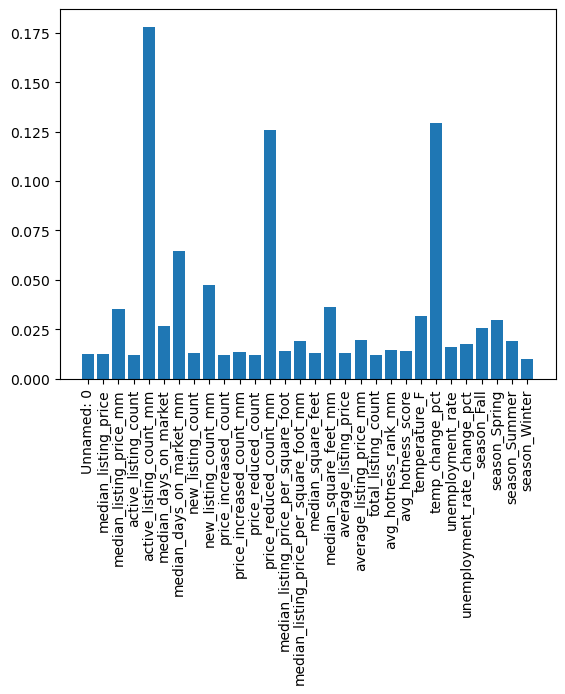

In [15]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features,tick_label=X.columns)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# active_listing_count_mm, price reduced count mm, temp change percent

## Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [17]:
classifier.fit(X_train, y_train)

C:\Users\jh580\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6491666666666667
Testing Data Score: 0.6575


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[181, 185],
       [ 89, 345]], dtype=int64)

In [20]:
confusion_matrix(y, classifier.predict(X))

array([[ 714,  764],
       [ 352, 1370]], dtype=int64)

In [21]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.49      0.57       366
           1       0.65      0.79      0.72       434

    accuracy                           0.66       800
   macro avg       0.66      0.64      0.64       800
weighted avg       0.66      0.66      0.65       800



MAKE PREDICTIONS?

In [ ]:
# # Generate a new data point (the red circle)
# import numpy as np
# import matplotlib.pyplot as plt
# new_data = np.array([[-2, 6]])
# plt.scatter(X[:, 0], X[:, 1], c=y)
# plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [ ]:
# # Predict the class (purple or yellow) of the new data point
# predictions = classifier.predict(new_data)
# print("Classes are either 0 (purple) or 1 (yellow)")
# print(f"The new point was classified as: {predictions}")

In [ ]:
# predictions = classifier.predict(X_test)
# pd.DataFrame({"Prediction": predictions, "Actual": y_test})

## Neural Networks Model

In [ ]:
# # Create scaler instance
# X_scaler = skl.preprocessing.StandardScaler(),

# # Fit the scaler
# X_scaler.fit(X_train)

In [29]:
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=30))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 155       
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [30]:
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
75/75 [==============================] - 0s 751us/step - loss: 0.6191 - accuracy: 0.6592
Epoch 2/100
75/75 [==============================] - 0s 764us/step - loss: 0.5184 - accuracy: 0.7483
Epoch 3/100
75/75 [==============================] - 0s 757us/step - loss: 0.4541 - accuracy: 0.8004
Epoch 4/100
75/75 [==============================] - 0s 703us/step - loss: 0.4124 - accuracy: 0.8200
Epoch 5/100
75/75 [==============================] - 0s 724us/step - loss: 0.3850 - accuracy: 0.8329
Epoch 6/100
75/75 [==============================] - 0s 771us/step - loss: 0.3652 - accuracy: 0.8442
Epoch 7/100
75/75 [==============================] - 0s 744us/step - loss: 0.3504 - accuracy: 0.8529
Epoch 8/100
75/75 [==============================] - 0s 717us/step - loss: 0.3395 - accuracy: 0.8579
Epoch 9/100
75/75 [==============================] - 0s 744us/step - loss: 0.3306 - accuracy: 0.8625
Epoch 10/100
75/75 [==============================] - 0s 730us/step - loss: 0.3239 - accura

75/75 [==============================] - 0s 703us/step - loss: 0.2449 - accuracy: 0.8988
Epoch 82/100
75/75 [==============================] - 0s 764us/step - loss: 0.2448 - accuracy: 0.8967
Epoch 83/100
75/75 [==============================] - 0s 710us/step - loss: 0.2446 - accuracy: 0.8967
Epoch 84/100
75/75 [==============================] - 0s 697us/step - loss: 0.2447 - accuracy: 0.8971
Epoch 85/100
75/75 [==============================] - 0s 730us/step - loss: 0.2442 - accuracy: 0.8971
Epoch 86/100
75/75 [==============================] - 0s 757us/step - loss: 0.2438 - accuracy: 0.8971
Epoch 87/100
75/75 [==============================] - 0s 676us/step - loss: 0.2439 - accuracy: 0.8967
Epoch 88/100
75/75 [==============================] - 0s 751us/step - loss: 0.2435 - accuracy: 0.8988
Epoch 89/100
75/75 [==============================] - 0s 717us/step - loss: 0.2432 - accuracy: 0.8971
Epoch 90/100
75/75 [==============================] - 0s 703us/step - loss: 0.2428 - accuracy: 

<AxesSubplot:>

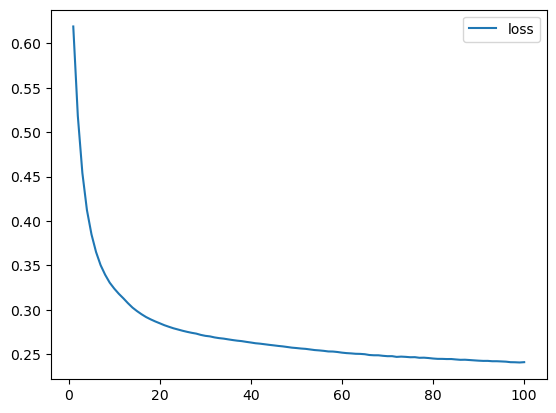

In [32]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

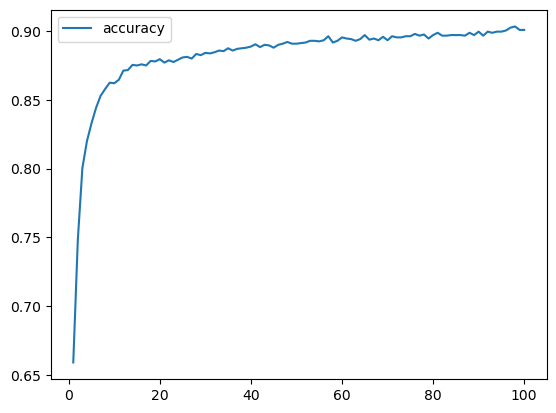

In [33]:
history_df.plot(y="accuracy")

In [34]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

25/25 - 0s - loss: 0.2454 - accuracy: 0.9100 - 120ms/epoch - 5ms/step
Loss: 0.24544373154640198, Accuracy: 0.9100000262260437


In [35]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = nn_model.predict(X_test)
confusion_matrix(y_true, y_pred)

25/25 [==============================] - 0s 792us/step


array([[366,   0],
       [434,   0]], dtype=int64)

In [36]:
confusion_matrix(y, nn_model.predict(X))

100/100 [==============================] - 0s 597us/step


array([[1478,    0],
       [1722,    0]], dtype=int64)

In [37]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63       366
           1       0.00      0.00      0.00       434

    accuracy                           0.46       800
   macro avg       0.23      0.50      0.31       800
weighted avg       0.21      0.46      0.29       800



C:\Users\jh580\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jh580\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jh580\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0],
best_hyper.values

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# 5) Determine Best Model to Utilize
Contextualize why.

# 6) Visualize Results
- Feature importances
- Original hotness feature versus prediction on hotness
- Comparison between temperature / unemployment rates / seasons versus hotness